In [325]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflowjs as tfjs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [326]:
columns = pd.read_csv('./data.csv', nrows=1).select_dtypes("number").columns
raw_dataset = pd.read_csv('./data.csv',usecols=columns, dtype=np.float32)
print(raw_dataset.dtypes)


Follicles    float32
Eggs         float32
dtype: object


In [327]:
dataset = raw_dataset.copy()
dataset.tail()

,Follicles,Eggs
1576,4.0,4.0
1577,7.0,5.0
1578,12.0,13.0
1579,16.0,13.0
1580,13.0,14.0


In [328]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [329]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Follicles,1265.0,12.871937,7.833070,0.0,7.0,12.0,17.0,61.0
Eggs,1265.0,12.196838,7.493774,0.0,7.0,11.0,15.0,55.0


In [330]:
train_features = train_dataset.copy()
train_features.tail()
test_features = test_dataset.copy()

train_labels = train_features.pop('Eggs')
test_labels = test_features.pop('Eggs')

In [331]:
from numpy import float32


np.array(train_features, dtype=float32)
# Convert numpy array to float32


array([[ 9.],
       [ 9.],
       [14.],
       ...,
       [21.],
       [17.],
       [ 9.]], dtype=float32)

In [332]:
first = np.array(train_features[:1], dtype=float32)

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()


First example: [[9.]]



In [333]:
follicles = np.array(train_features['Follicles'], dtype=float32)

In [334]:
follicles_model = keras.Sequential([layers.Dense(units=1,dtype=tf.float32)])

In [335]:
# follicles_model.predict(follicles[:10])


In [336]:
from numpy import dtype


follicles_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
    )

In [337]:
%%time
history = follicles_model.fit(
    train_features['Follicles'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 13.8 s
Wall time: 9.25 s


In [338]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.354503,3.550149,95
96,3.313831,3.924437,96
97,3.385834,3.613176,97
98,3.326379,3.648259,98
99,3.336342,3.524785,99


In [339]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Eggs]')
  plt.legend()
  plt.grid(True)

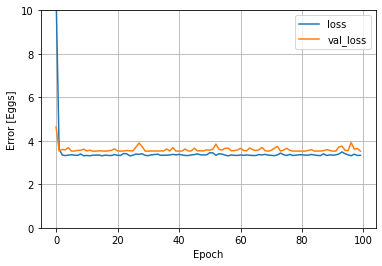

In [340]:
plot_loss(history)


In [341]:
test_results = {}

test_results['follicles_model'] = follicles_model.evaluate(
    test_features['Follicles'],
    test_labels, verbose=0)

In [342]:
x = tf.linspace(0.0, 80, 100)
y = follicles_model.predict(x)

4/4 [==============================] - 0s 2ms/step


In [343]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Follicles'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Follicles')
  plt.ylabel('Eggs')
  plt.legend()

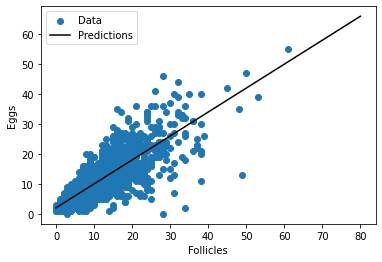

In [344]:
plot_horsepower(x, y)


In [345]:
pd.DataFrame(test_results, index=['Mean absolute error [Eggs]'])


,follicles_model
Mean absolute error [Eggs],3.615661


In [346]:
# test_predictions = follicles_model.predict(test_features).flatten()

# a = plt.axes(aspect='equal')
# plt.scatter(test_labels, test_predictions)
# plt.xlabel('True Values [MPG]')
# plt.ylabel('Predictions [MPG]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

ValueError: in user code:

    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "sequential_21" (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer "sequential_21" (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • training=False
      • mask=None


In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Eggs]')
_ = plt.ylabel('Count')

In [347]:
tfjs.converters.save_keras_model(follicles_model, './eggPredictionModel')


In [348]:
follicles_model.inputs[0].dtype


tf.float32

In [349]:
follicles_model.outputs[0].dtype

tf.float32